# Loan Approval Prediction

The aim of this project is to predict whether the loan would be approved by the bank, by analyzing the applicant's information which includes loan amount, tenure, cibil score, education, assests and many other variables. Thorugh this project, we can analyze the factors that affect the loan approval and also predict the loan approval status for a new applicant. Moreover, this will help in providing priority services to the customers who are more likely to get their loan approved.

### About the dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

### Data Dictionary
| Variable | Description |
| --- | --- |
|loan_id | Unique loan ID|
|no_of_dependents | Number of dependents of the applicant|
|education | Education level of the applicant|
|self_employed | If the applicant is self-employed or not|
|income_annum | Annual income of the applicant|
|loan_amount | Loan amount requested by the applicant|
|loan_tenure | Tenure of the loan requested by the applicant (in Years)|
|cibil_score | CIBIL score of the applicant|
|residential_asset_value | Value of the residential asset of the applicant|
|commercial_asset_value | Value of the commercial asset of the applicant|
|luxury_asset_value | Value of the luxury asset of the applicant|
|bank_assets_value | Value of the bank asset of the applicant|
|loan_status | Status of the loan (Approved/Rejected)|

In [108]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [109]:
# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data Preprocessing

In [111]:
# Checking the shape of the dataset
df.shape

(4269, 13)

Removing the unnecessary load_id as it is an identifier column

In [113]:
df.drop(columns='loan_id', inplace=True)

In [114]:
# Checking for null/missing values
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [115]:
# Checking the data types of the columns
df.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

The dataset has 4 kinds of assests that are - Residential, Commericial, Luxury and Bank. I am categorizing these assets in to two category i.e. Movable and Immovable assets. The Residential and Commericial assest would be added to the Immovable assets and Luxury and Bank assets would be added to the Movable assets.

In [117]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [118]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

Descriptive Statistics

In [120]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [121]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the distribution of the data across the varaiables, followed by relationship between the independent and target variable and the correlation among the variables. Through the visualization, I will be able to understand the possible trends and patterns in the data and come to know about the hidden insights of the data.

#### Number of Dependents

Text(0.5, 1.0, 'Number of Dependents')

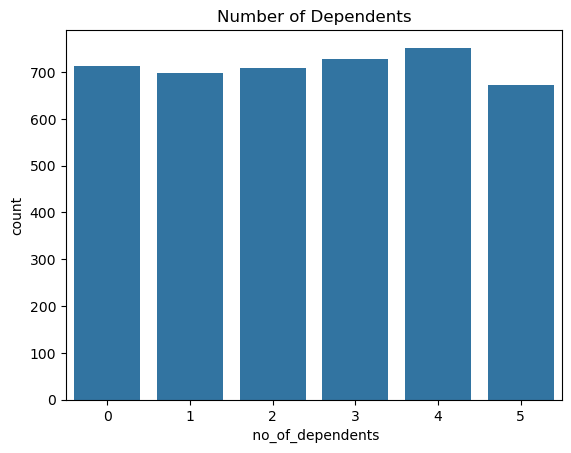

In [125]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

This graph shows the number of dependent indivduals on the loan applicant. There is not much difference in the number of dependents, however, there are more applicants with 4 and 3 dependents than the other categories. Since the number of dependents increases the disposable income of the applicant decreases. So I assume that that the number of applicants with 0 or 1 dependent will have higher chances of loan approval.

#### Education and Income

<Axes: xlabel=' education', ylabel=' income_annum'>

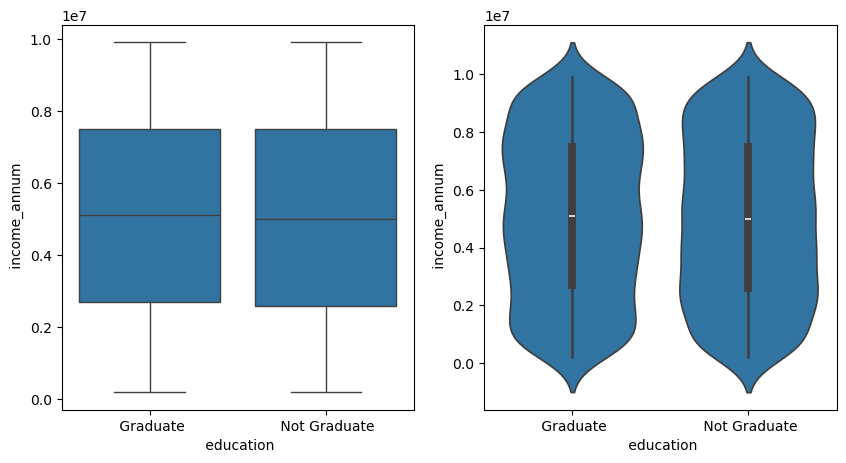

In [128]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

These two graphs - boxplot and violinplot visualizes the education of applicants along with their annual income. The boxplot shows some interesting fact that both the graduates and non-graduates have nearly same median income with very small increase in income of graduates. Moreover the violinplot shows the distribution of income among the graduates and non graduate applicants, where we can see that non graduate applicants have a even distribution between income 2000000 and 8000000, whereas there is a uneven distribution among the graduates with more applicants having income between 6000000 and 8000000. Since there is not much change in annual income of graduates and non graduates, I assume that education does not play a major role in the approval of loan.

#### Employment Status and Education

Text(0.5, 1.0, 'Self Employed')

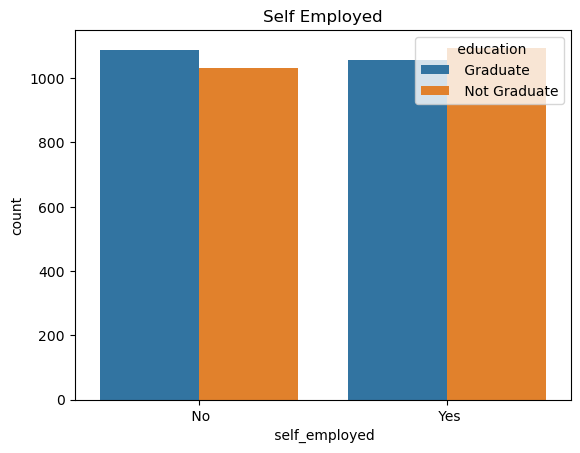

In [131]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

This graph shows the number of self employed applicants along with their education. From the educational prepespective the majority of the graducate applicants are not self employed wheareas majority of the non-graduates are self employed. This means that graduates applicants are more likely to be salaried employees and non-graduates are more likely to be self employed. This could be a determining factor in loan approval because salaried employees are more likely to have a stable income and hence are more likely to pay back the loan as compared to self employed applicants whose income may not be stable. But this could also be possible that the self employed applicants are earning more than the salaried employees and hence are more likely to pay back the loan. This is a very important factor to consider while predicting the loan approval.

#### Loan Amount and Tenure

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

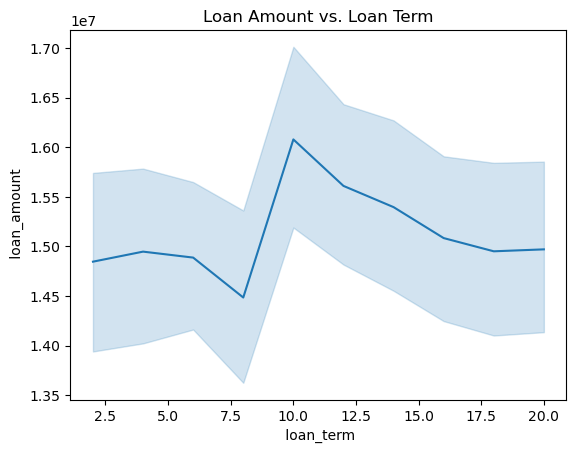

In [134]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

This line plot shows the trend between the loan amount and the loan tenure. Between the loan tenure of 2.5 - 7.5 years the loan amount  is between 1400000 - 15500000. However the loan amount is significantly higher for the loan tenure of 10 years. 

#### CIBIL Score Distribution

<Axes: xlabel=' cibil_score', ylabel='Count'>

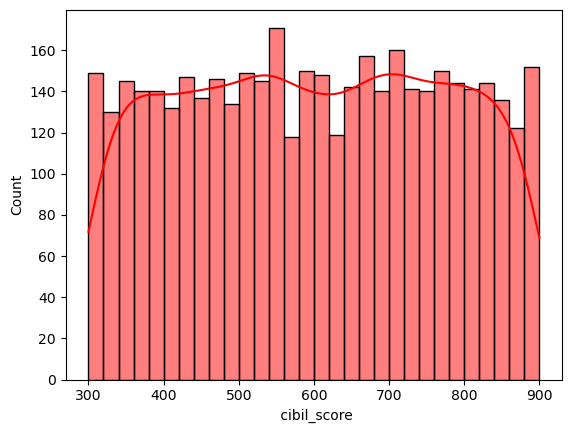

In [137]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

Before looking at the cibil score, lets have a look at the cibil score ranges and their meaning.


|Cibil Score|Meaning|
|---|---|
|300-549|Poor|
|550-649|Fair|
|650-749|Good|
|750-799|Very Good|
|800-900|Excellent|

Source: [godigit.com](https://www.godigit.com/finance/credit-score/ranges-of-credit-score)

Taking the above table as a reference for the cibil score quality, majority of the customers have cibil score below 649, which affects their loan application. However there are many applicants with cibil score above 649, which is a good sign for the bank. The bank can target these customers and provide them with priority services. The bank can also provide them with special offers and discounts to attract them to take loans from the bank. From this, I build a hypothesis that the customers with cibil score above 649 are more likely to get their loan approved.

#### Asset Distribution

<Axes: xlabel='Immovable_assets', ylabel='Count'>

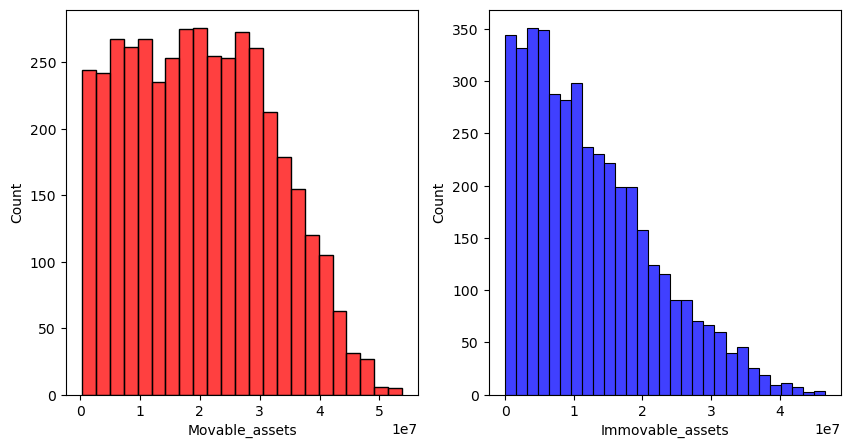

In [141]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')

Assets play a major role in loan application. They provides a security to the bank that the person will repay the loan. Looking at the assets, as eralier mentionedI have categorized them in movable and immovable assets. The above graphs shows the distribution of movable and immovable assets in the dataset.

Looking at the movable assets which include bank assets and luxury assets, majority of the applicants have less than 30 million and there is a slight trend of decreasing number of applicants as the movable assets increases. Coming to the immovable assets, which include residential assets and commercial assets, majority of the applicants have less than 15 million of immovable assets and there is a strong trend of decreasing number of applicants as the immovable assets increases after 20 million.

Till now in the EDA, I have explored the distribution of data across the various features as well as relationship between the some of the variables as well and made some assumptions and hypothesis. Now, in order to prove my assumptions and hypothesis I will be looking at the visualization of the relation between the independent variables and the target variable.

#### Number of Dependants Vs Loan Status

<Axes: xlabel=' no_of_dependents', ylabel='count'>

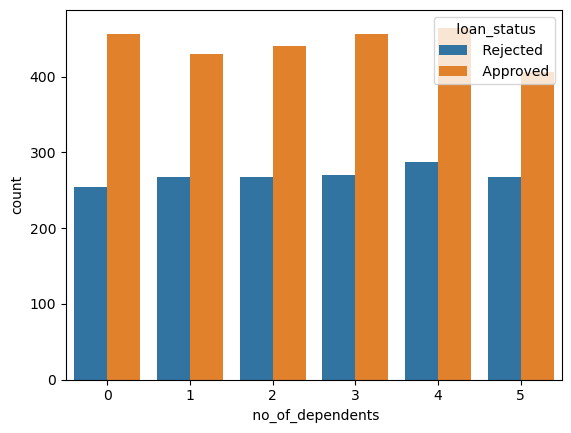

In [145]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

My hypothesis regarding the loan approval based on number of dependents has mixed results. First the hypothesis was somewhat true regarding the rejection chances, the number of loan rejection increases with increase in number of dependents. But the hypothesis was not true regarding the approval chances, the number of loan approval decreases with increase in number of dependents as per my hypothesis. But according to this graph, there has been no major change in the loan approval count with increase in number of dependents. So, my hypothesis regarding the loan approval based on number of dependents is not true.

#### Education Vs Loan Status

Text(0.5, 1.0, 'Loan Status by Education')

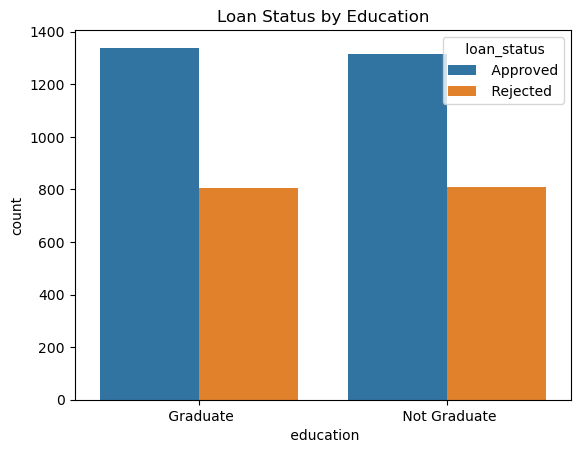

In [148]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

My hypothesis regarding the education not being factor in loan approval was right. The graph shows very minor difference between loan approval and rejection count for the graduate and non graduate applicants. The difference is not significant enough.

#### Annual Income vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

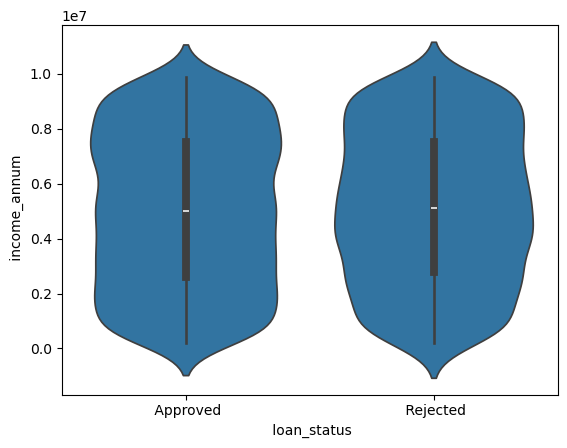

In [151]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

On the whole, there has been no major difference between the annual incomes of the applicant with approved or rejected loan. But still, the approved loan applicants tend to have a higher annual income than the rejected loan applicants which is visible from the violin plot where the approved loan applicants have a higher density in the annual income near 8 miilion annual income.

#### Loan amount & tenure Vs Loan Status

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

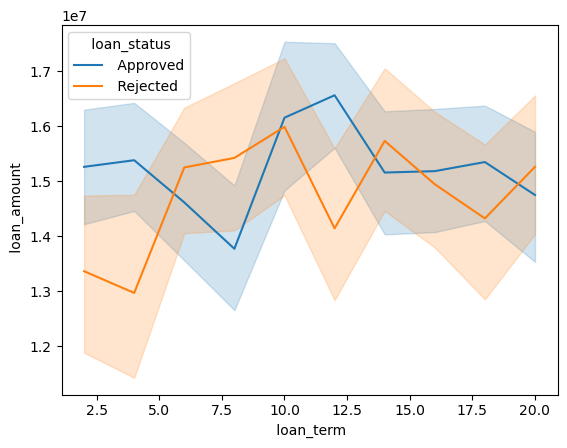

In [154]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

This graph shows the relation between loan amount, loan tenure and loan status. Generally, the approved loans tend have higher amount and shorter repayment tenure. The rejected loans tend to have lower amount and longer repayment tenure. This could be a result of the bank's policy to reject loans with longer repayment tenure. The bank may also reject loans with lower amount as they may not be profitable for the bank.

#### CIBIL Score Vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

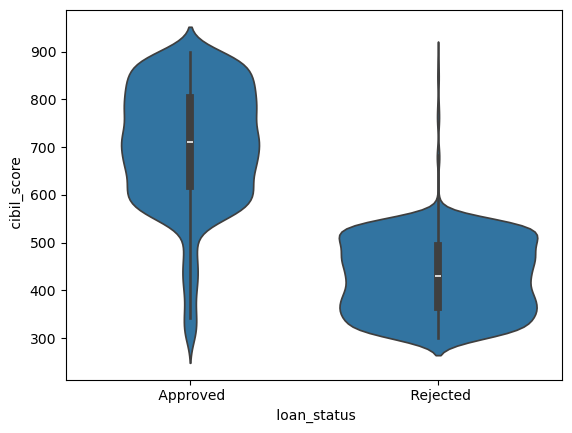

In [157]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

My hypothesis regarding the cibil score and loan approval is absolutely correct. It is evident through the violinplot, where the there is a high distribution above 600 cibil score from the loan approved category. The distribution of the loan not approved category is more spread out and has cibil score less than 550. This also proves my assumption that majority of the applicants have a poor/fair cibil score which affects their loan approval. Hence, having a high cibil score particularly grater than 600 would definitely increase the chances of loan approval.

#### Assets Vs Loan Status

<Axes: xlabel='Immovable_assets', ylabel='Count'>

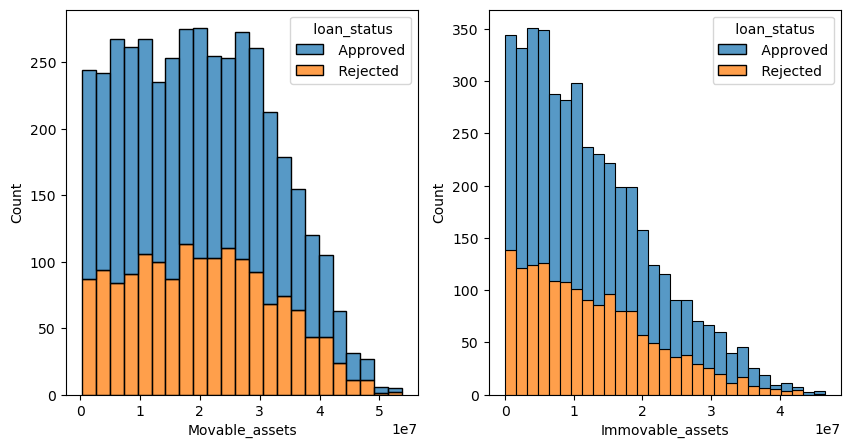

In [160]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

Assets provide security to the bank against which the loan is issued. These two graph visualizes the relation between the movable and immovable assets along with the loan status. The both graph shows that, with increase in the assets the chances of loan approval increases and rejection decreases. The graph also shows that, the movable assets are more than the immovable assets.

## Data Preprocessing 2

#### Label Encoding the categorical variables

In [164]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [165]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


## Coorelation Matrix Heatmap

<Axes: >

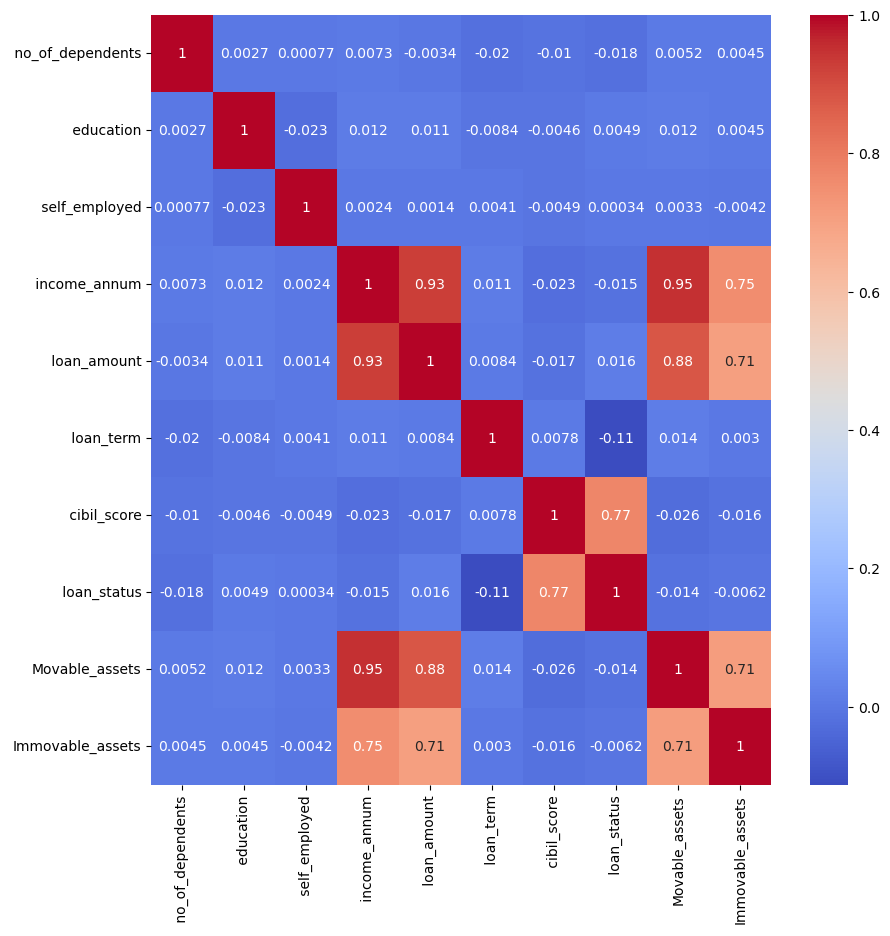

In [167]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

This coorelation matrix heatmap has the folowing strong correlations:
1. Movable Assets and Immovable Assets
2. Income and Movable Assets
3. Income and Immovable Assets
4. Movable Assets and Loan Amount
5. Immovable Assets and Loan Amount
6. Loan Status and Cibil Score
7. Loan Amount and Income

The coorelation between the movable and immovable assets is justified because both come under assets and its obvious that person with more movable assets will have more immovable assets and vice versa. Same is with Income and Movables and Immovale assets. The person with greater income will have greater assets.

Now, I will be exploring the coorleation between Assets and Loan Amount, and also between Income and Loan Amount. The relation between the loan status and cibil score is already explored in the previous section.

#### Assets Vs Loan Amount

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

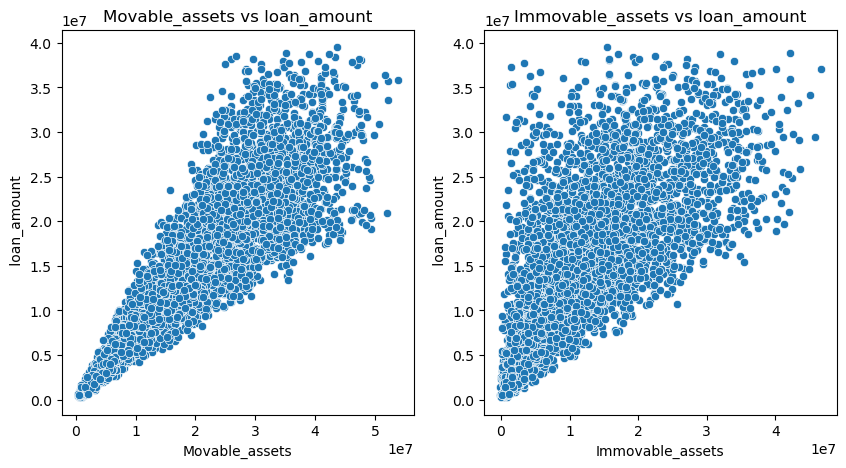

In [171]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

The loan amount has positive relation with movable and immovable assets. The more the assets, the more the loan amount issued by the bank.

#### Loan Amount Vs Income

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

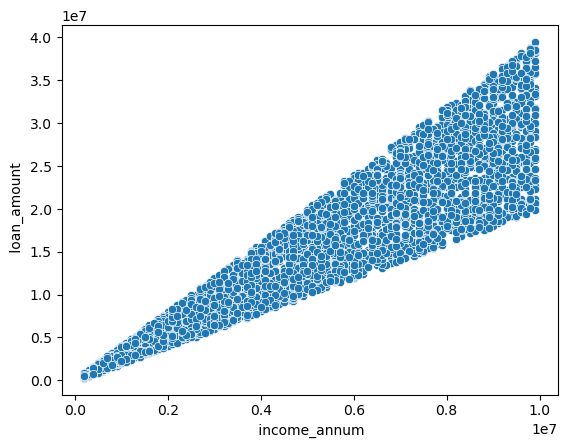

In [174]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

The loan amount and applicant's annual income have a very direct relation between them. The higher the income, the higher the loan amount. This is because the applicant's income is the main factor in deciding the how much loan needed.

## Train Test Split

In [177]:
from scipy.stats import zscore

df['z_income'] = zscore(df[' income_annum'])

# Outliers where absolute z-score > 3
outliers_z = df[abs(df['z_income']) > 3]
print("Outliers in income_annum (Z-score):", outliers_z.shape[0])


Outliers in income_annum (Z-score): 0


In [178]:
Q1 = df[' loan_amount'].quantile(0.25)
Q3 = df[' loan_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[' loan_amount'] < lower_bound) | (df[' loan_amount'] > upper_bound)]
print("Outlier count:", outliers.shape[0])


Outlier count: 0


In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

## Model Building

Accuracy Score:  0.905152224824356


Text(0.5, 1.0, 'Confusion Matrix')

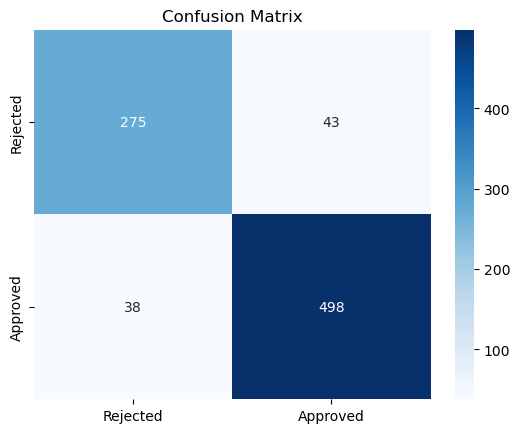

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Only transform testing data

# Step 6: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
  
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix') 

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_auc_score, roc_curve, log_loss, classification_report)
import seaborn as sns
import matplotlib.pyplot as plt

# Assume X_train_scaled, X_test_scaled, y_train, y_test are ready
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]  # Probabilities for ROC-AUC
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 Precision:", precision_score(y_test, y_pred))
print("🔹 Recall:", recall_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))
print("🔹 ROC AUC:", roc_auc_score(y_test, y_proba))
print("🔹 Log Loss:", log_loss(y_test, y_proba))

# Detailed classification report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print(model.coef_)
print(model.intercept_)

🔹 Accuracy: 0.905152224824356
🔹 Precision: 0.9205175600739371
🔹 Recall: 0.9291044776119403
🔹 F1 Score: 0.924791086350975
🔹 ROC AUC: 0.967262742889327
🔹 Log Loss: 0.22676077658076946

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

[[-0.02786941  0.02189136  0.06367308 -0.82987027  1.28577178 -0.86606677
   4.17321518  0.39138276  0.09253175 -0.82987027]]
[1.74882761]


In [183]:
print(model.score(X_test,y_test))
print(model.classes_)


0.6276346604215457
[0 1]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


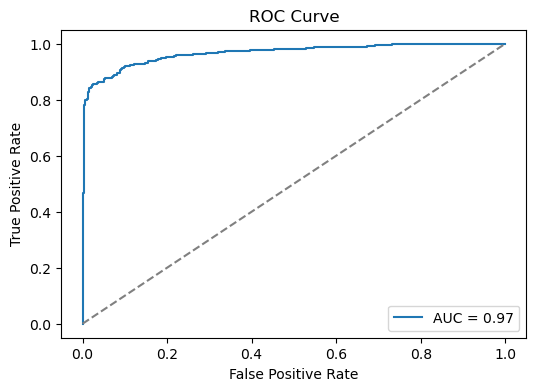

In [184]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


🔹 Accuracy: 0.9320843091334895
🔹 Precision: 0.9492481203007519
🔹 Recall: 0.9421641791044776
🔹 F1 Score: 0.9456928838951311
🔹 ROC AUC: 0.9857141180888012
🔹 Log Loss: 0.1484606947468237

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       318
           1       0.95      0.94      0.95       536

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



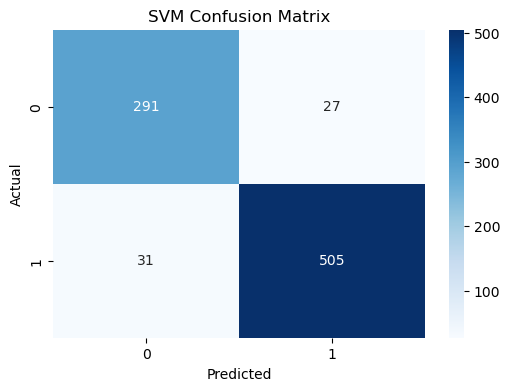

In [185]:
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_auc_score, roc_curve, log_loss, classification_report)
import seaborn as sns
import matplotlib.pyplot as plt

# Assume X_train_scaled, X_test_scaled, y_train, y_test are ready

# 1. Train SVM model
svm_model = SVC(kernel='rbf', probability=True, C=1.0)
svm_model.fit(X_train_scaled, y_train)

# 2. Predict classes and probabilities
y_pred = svm_model.predict(X_test_scaled)
y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]  # Class 1 probability

# 3. Evaluation Metrics
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 Precision:", precision_score(y_test, y_pred))
print("🔹 Recall:", recall_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))
print("🔹 ROC AUC:", roc_auc_score(y_test, y_proba))
print("🔹 Log Loss:", log_loss(y_test, y_proba))

# 4. Detailed classification report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# 5. Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [186]:
print(model.coef_)

[[-0.02786941  0.02189136  0.06367308 -0.82987027  1.28577178 -0.86606677
   4.17321518  0.39138276  0.09253175 -0.82987027]]


In [187]:
    print(model.intercept_)

[1.74882761]


NAIVE BAYES

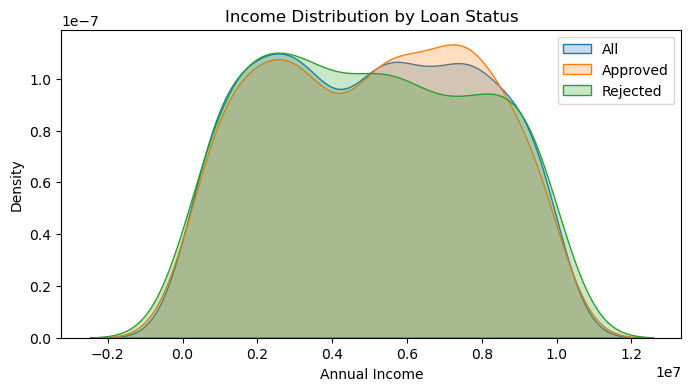

In [189]:
# Example for one numeric feature (e.g., income_annum)
plt.figure(figsize=(8, 4))
sns.kdeplot(X_test[' income_annum'], label='All', fill=True)
sns.kdeplot(X_test[y_test == 1][' income_annum'], label='Approved', fill=True)
sns.kdeplot(X_test[y_test == 0][' income_annum'], label='Rejected', fill=True)
plt.title("Income Distribution by Loan Status")
plt.xlabel("Annual Income")
plt.legend()
plt.show()


In [190]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


I will be using the following machine learning models to predcit the loan approval status:
1. Decision Tree Classifier
2. Random Forest Classifier

#### Decision Tree Classifier

In [193]:
from sklearn.tree import DecisionTreeClassifier
# Create decision tree object

dtree = DecisionTreeClassifier()

In [194]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [195]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [196]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)

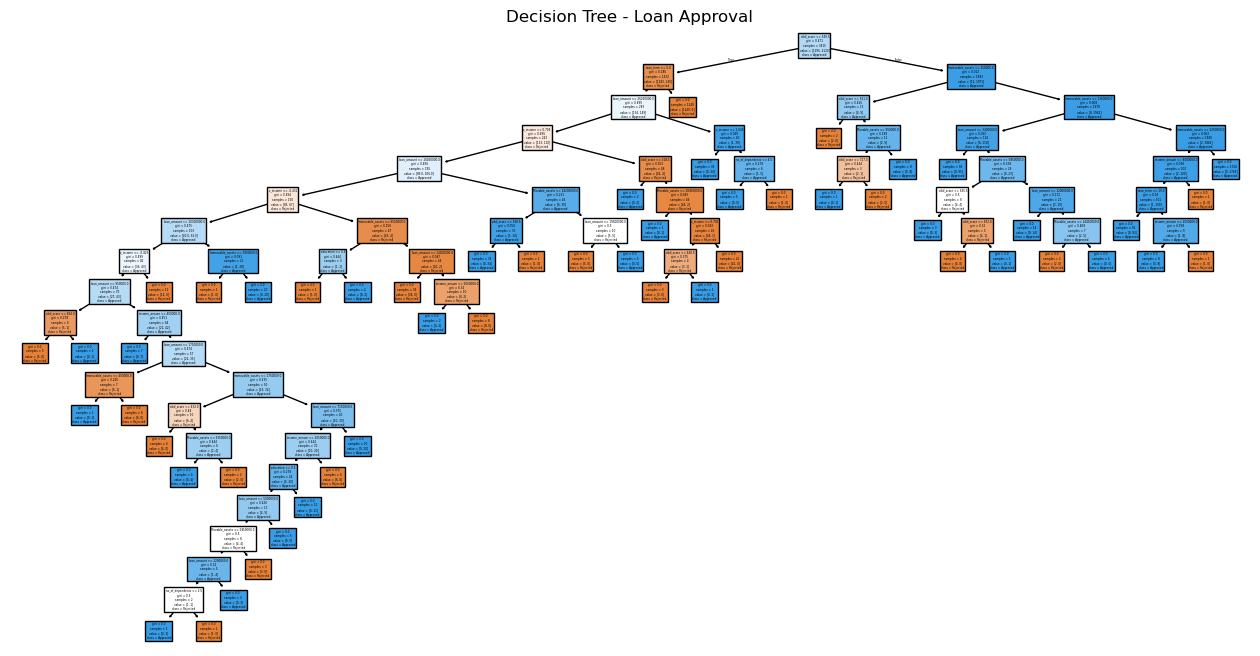

In [197]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(dtree, feature_names=X_train.columns, class_names=["Rejected", "Approved"], filled=True)
plt.title("Decision Tree - Loan Approval")
plt.show()


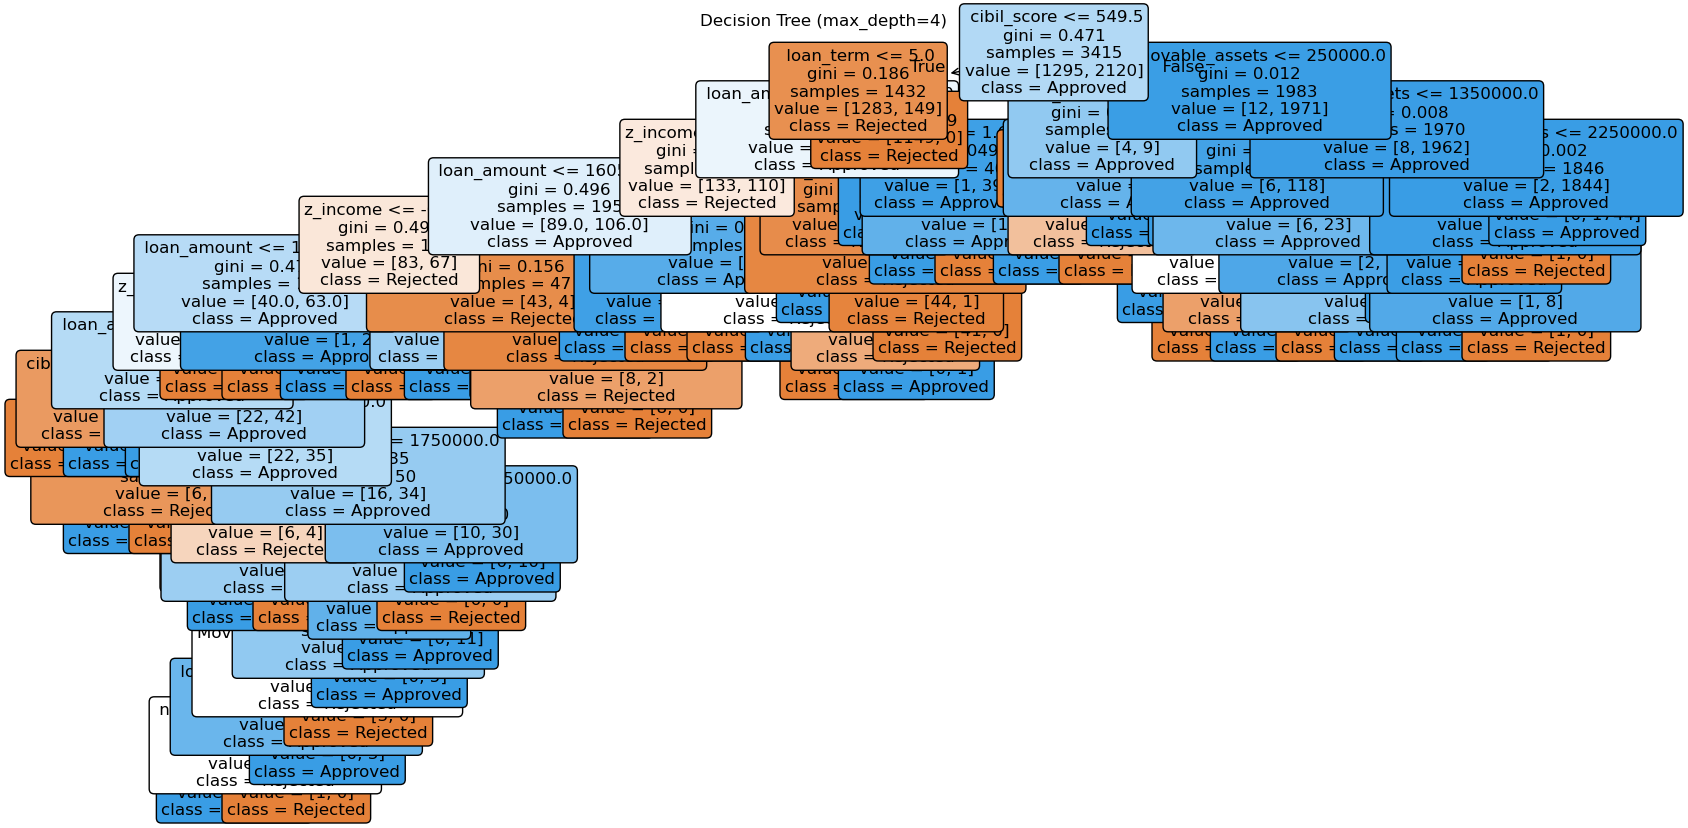

In [198]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Increase size
plot_tree(dtree, 
          feature_names=X_train.columns, 
          class_names=["Rejected", "Approved"], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree (max_depth=4)")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_8956\1935529041.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance, y=feat_importance.index, palette='viridis')


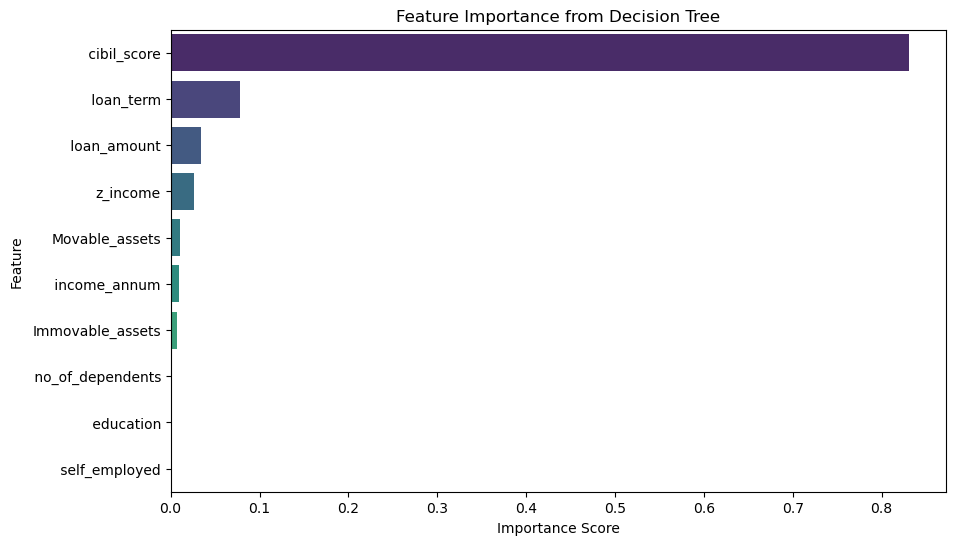

In [199]:
import pandas as pd
import seaborn as sns

feat_importance = pd.Series(dtree.feature_importances_, index=X_train.columns)
feat_importance = feat_importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index, palette='viridis')
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


#### Random Forest Classifier

In [231]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [233]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [237]:
# Training Accuracy
rfc.score(X_train, y_train)

1.0

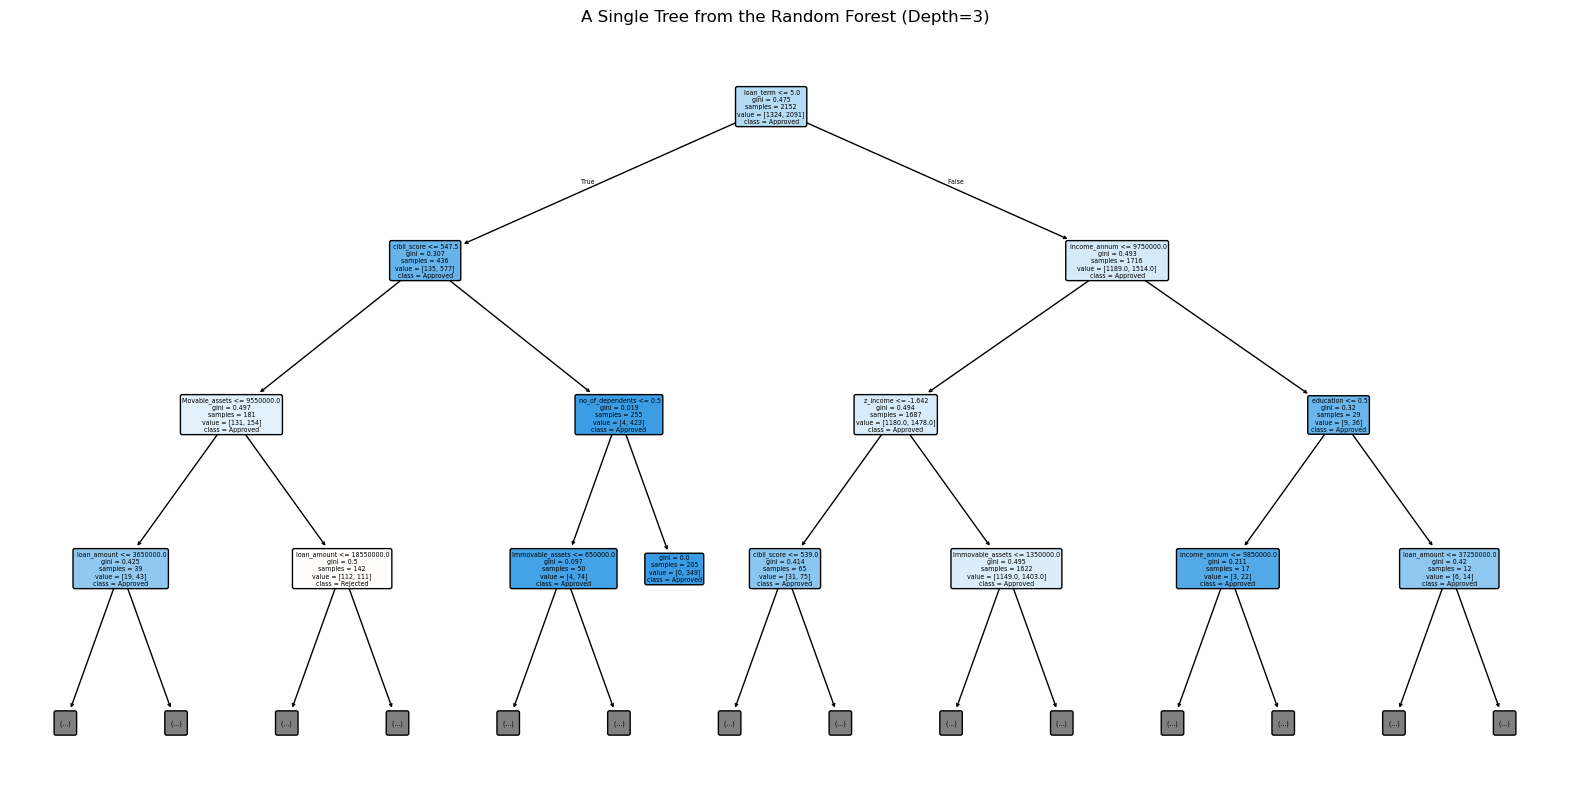

In [204]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rfc.estimators_[0], 
          feature_names=X_train.columns, 
          class_names=["Rejected", "Approved"], 
          filled=True, rounded=True, max_depth=3)
plt.title("A Single Tree from the Random Forest (Depth=3)")
plt.show()


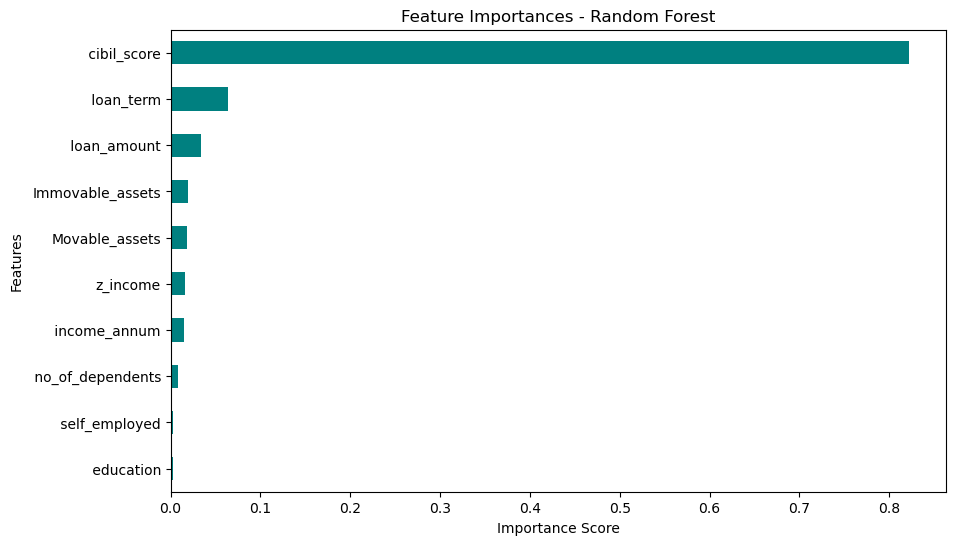

In [205]:
import pandas as pd

feat_importance = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importance = feat_importance.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feat_importance.plot(kind='barh', color='teal')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [215]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict

AttributeError: 'RandomForestClassifier' object has no attribute 'pred'

## Model Evalution

#### Confusion Matrix

NameError: name 'rfc_pred' is not defined

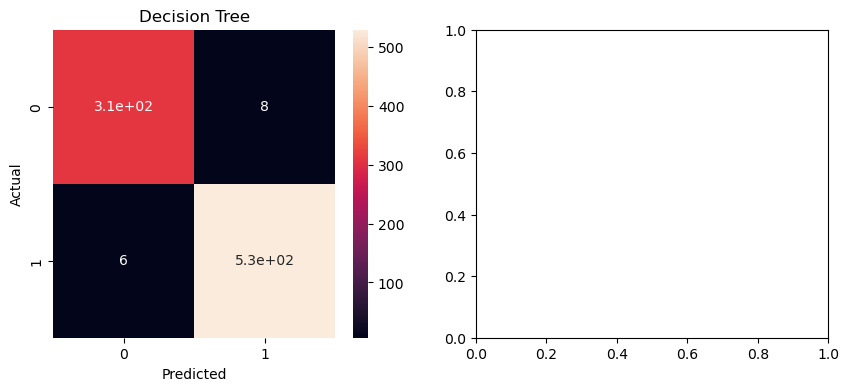

In [207]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

The above confusion matrix heatmap visualizes the the true positive and true negative value counts in both the machine learning models. The decision tree classfier has only 17 false positve and negative valyes where has random forest classifier has 21 false postive and negative values. The decision tree classifier has a better accuracy compared to random forest classifier.

#### Distribution Plot

C:\Users\Admin\AppData\Local\Temp\ipykernel_8956\505637470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
C:\Users\Admin\AppData\Local\Temp\ipykernel_8956\505637470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

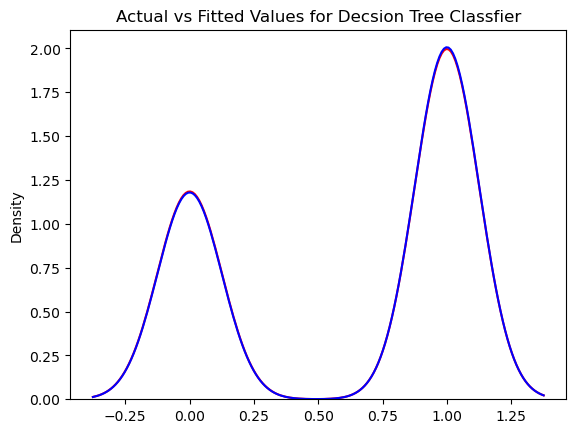

In [209]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = dtree_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8956\1367839858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")


NameError: name 'rfc_pred' is not defined

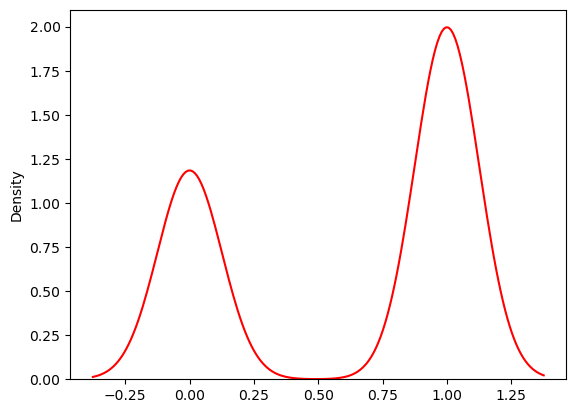

In [211]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = rfc_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Random Forest Classfier')

The distribution plot of both the models are almost same. There is very minute difference in the distribution density of the predicted and actual values in the random forest classifer. However, in case of decision tree classifier, the distribution density of the predicted values clearly overlaps with the actual values. Hence, we can say that the decision tree classifier is a better model than the random forest classifier for this dataset.

#### Classification Report

In [213]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



NameError: name 'rfc_pred' is not defined

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))

From all the above metrics, graphs and reports, I conclude that descision tree classifier is a better machine learning model to predict the loan approval status of a person.

## Conclusion
From the exploratory data analysis, we can conclude that the following factors are important for the approval of loan:
- CIBIL Score: People with higher CIBIL score have higher chances of loan approval
- Number of Dependents: People with more number of dependents have less chances of loan approval
- Assets: People with more assets ( including movable and immovable) have higher chances of loan approval
- Loan Amount and Tenure: People with higher loan amount and lower tenure have more chances of loan approval

Coming to the machine learning models, I have used Decision Tree Classifier and Random Forest Classifier. Both the models have given excellent results having accuracies - 91.4 % and 89.4 % repectively. But the decision tree classifier has yielded better results than the random forest classifier.

In [229]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]



ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_scaled, y_train)
y_pred_ada = ada_model.predict(X_test_scaled)
y_proba_ada = ada_model.predict_proba(X_test_scaled)[:, 1]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [219]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
y_proba_gb = gb_model.predict_proba(X_test_scaled)[:, 1]


In [227]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:01:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [239]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(name, y_test, y_pred, y_proba):
    print(f"📌 {name} Model")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_proba))
    print("-"*40)


In [241]:
evaluate_model("SVM", y_test, y_pred_svm, y_proba_svm)
evaluate_model("AdaBoost", y_test, y_pred_ada, y_proba_ada)
evaluate_model("Gradient Boosting", y_test, y_pred_gb, y_proba_gb)
evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb)


📌 SVM Model
Accuracy : 0.9320843091334895
Precision: 0.9492481203007519
Recall   : 0.9421641791044776
F1 Score : 0.9456928838951311
ROC AUC  : 0.9857141180888012
----------------------------------------
📌 AdaBoost Model
Accuracy : 0.9695550351288056
Precision: 0.96875
Recall   : 0.9832089552238806
F1 Score : 0.975925925925926
ROC AUC  : 0.9957963719140148
----------------------------------------
📌 Gradient Boosting Model
Accuracy : 0.9730679156908665
Precision: 0.9689213893967094
Recall   : 0.9888059701492538
F1 Score : 0.9787626962142197
ROC AUC  : 0.9975183047029006
----------------------------------------
📌 XGBoost Model
Accuracy : 0.9730679156908665
Precision: 0.9706422018348624
Recall   : 0.9869402985074627
F1 Score : 0.9787234042553191
ROC AUC  : 0.997239627335023
----------------------------------------


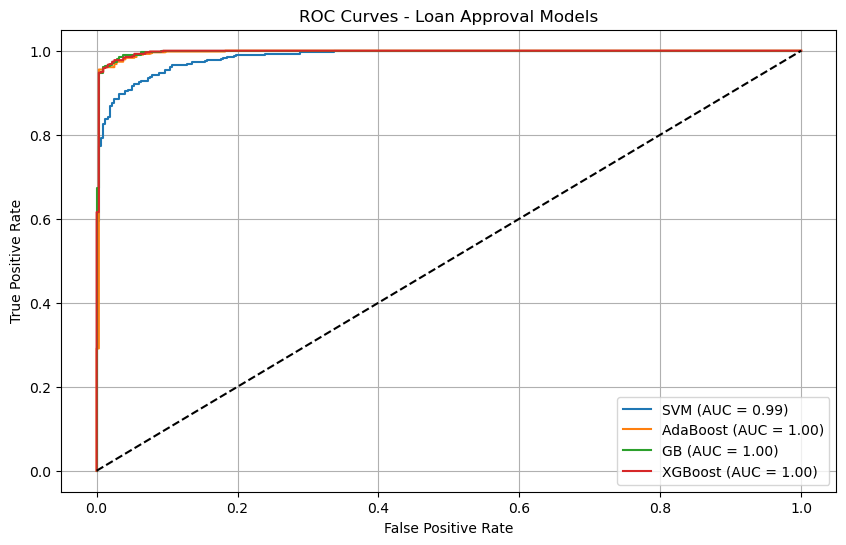

In [243]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

models = {
    'SVM': (y_test, y_proba_svm),
    'AdaBoost': (y_test, y_proba_ada),
    'GB': (y_test, y_proba_gb),
    'XGBoost': (y_test, y_proba_xgb)
}

plt.figure(figsize=(10, 6))
for name, (yt, yp) in models.items():
    fpr, tpr, _ = roc_curve(yt, yp)
    auc = roc_auc_score(yt, yp)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Loan Approval Models")
plt.legend()
plt.grid(True)
plt.show()


In [247]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Base learner: shallow decision tree
base_tree = DecisionTreeClassifier(max_depth=1)  # Very weak learner

# AdaBoost using the base tree
ada_model = AdaBoostClassifier(estimator=base_tree, n_estimators=100, learning_rate=0.1)
ada_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test_scaled)
y_proba_ada = ada_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("🔍 AdaBoost with DecisionTree base")
print(classification_report(y_test, y_pred_ada))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_ada))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🔍 AdaBoost with DecisionTree base
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       318
           1       1.00      0.93      0.96       536

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.95       854
weighted avg       0.96      0.96      0.96       854

ROC AUC Score: 0.9948518023092087


In [255]:
import pandas as pd
import numpy as np

# ML + Preprocessing
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Assuming df1 is your preprocessed DataFrame
X = df.drop(columns=' loan_status')
y = df[ ' loan_status']

# 2. Define Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Scoring Metrics Dictionary (you can choose one or more)
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# ----------------------------
# 🔷 4. SVM Pipeline & CV
# ----------------------------
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, C=1.0))
])

print("\n🔹 SVM Cross-Validation Results:")
for name, score_fn in scoring_metrics.items():
    scores = cross_val_score(svm_pipeline, X, y, cv=cv, scoring=score_fn)
    print(f"{name.upper():<10} : {scores.mean():.4f} ± {scores.std():.4f}")

# ----------------------------
# 🔶 5. XGBoost & CV
# ----------------------------
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                          use_label_encoder=False, eval_metric='logloss', random_state=42)

print("\n🔹 XGBoost Cross-Validation Results:")
for name, score_fn in scoring_metrics.items():
    scores = cross_val_score(xgb_model, X, y, cv=cv, scoring=score_fn)
    print(f"{name.upper():<10} : {scores.mean():.4f} ± {scores.std():.4f}")



🔹 SVM Cross-Validation Results:
ACCURACY   : 0.9424 ± 0.0100
PRECISION  : 0.9558 ± 0.0088
RECALL     : 0.9514 ± 0.0089
F1         : 0.9536 ± 0.0081
ROC_AUC    : 0.9848 ± 0.0043

🔹 XGBoost Cross-Validation Results:


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

ACCURACY   : 0.9808 ± 0.0032


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

PRECISION  : 0.9796 ± 0.0075


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

RECALL     : 0.9898 ± 0.0035


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1         : 0.9847 ± 0.0025


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

ROC_AUC    : 0.9978 ± 0.0012


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
